In [25]:
from bs4 import BeautifulSoup
from itertools import chain
import matplotlib
from collections import Counter
from nltk.corpus import stopwords
import urllib
from lxml import html
import numpy as np
import requests
import pandas as pd
import nltk
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from matplotlib import pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import requests_cache
requests_cache.install_cache('demo_cache')
import math
from matplotlib import pyplot
import statsmodels
from scipy.interpolate import interp1d
import warnings
from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings("ignore")

In [26]:
def find(state_code,par,par_1):
    url = 'http://www.quandl.com/api/v3/datasets/ZILL/'
    url = url+(par)+state_code + "_"+(par_1)
    response = requests.get(url)
    house_iv = response.json()
    house_iv = house_iv['dataset']['data']
    house_iv = pd.DataFrame(house_iv)
    return house_iv


def TimeSeries(ts):
    ts = ts.reindex(index=ts.index[::-1])
    ts.index = ts[0]
    ts.index = pd.to_datetime(ts.index)
    a = range(0,len(ts[0]))
    ts[0] = a
    result = []
    for i in ts[1]:
        i  = math.log(i)
        result.append(i)
    ts[1]  = result
    ts["firstdif"] = ts[1]-ts[1].shift(1)
    ts["seasondif"] = ts["firstdif"]-ts["firstdif"].shift(12)
    new_date_time = ts.copy()
    del ts[1]
    del ts['firstdif']
    del ts[0]
    ts= ts.dropna(inplace = False)
    res = statsmodels.tsa.stattools.arma_order_select_ic(ts, max_ar=4, max_ma=4, ic='bic', trend='c', model_kw={}, fit_kw={})
    ar = res.bic_min_order[0]
    ma = res.bic_min_order[1]
    model = ARIMA(ts,order = (ar,0,ma))
    model_fit = model.fit(disp = 0)
    forcast = model_fit.forecast(steps = 12)[0]
    new_date_time = new_date_time.dropna()
    new_res = []
    new_res_2 = []
    for i in range(0,12):
        new = forcast[i]+new_date_time["firstdif"][-12+i]
        new_res.append(new)
    
    tmp = new_res[0]+new_date_time[1][-1]
    new_res_1 = [tmp]
    for i in range(1,12):
          tmp = new_res[i]+tmp
          new_res_1.append(tmp)
    for i in new_res_1:
        new_2 = math.exp(i)
        new_res_2.append(new_2)
    return new_res_2,ar,ma

In [27]:
def Forecast(data):
    data_train = data.iloc[12::]
    test = TimeSeries(data_train)[0]
    data_test = pd.DataFrame((data.iloc[0:12][1]))
    data_test = data_test.reindex(index=data_test.index[::-1])
    data_test[0] = test
    data_test["res"] =  data_test[0]-data_test[1]
    del data_test[1]
    del data_test[0]
    return data_test

In [36]:
data_train = ca.iloc[12::]
test = TimeSeries(data_train)[0]

In [37]:
data_test = pd.DataFrame((ca.iloc[0:12][1]))
data_test.reindex(index=data_test.index[::-1])
data_test[0] = test

In [28]:

ca = find("00001","S","A")
ca_train = ca.iloc[12::]
test = (TimeSeries(ca_train)[0])

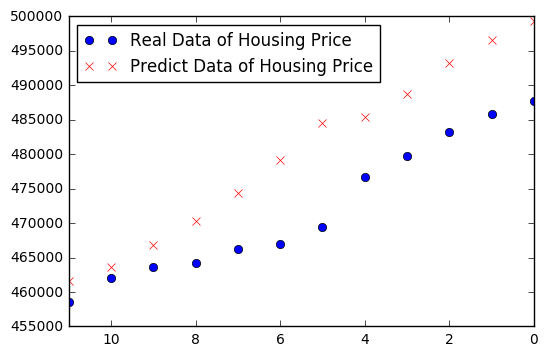

In [21]:
ca_test = pd.DataFrame((ca.iloc[0:12][1]))
ca_test = ca_test.reindex(index=ca_test.index[::-1])
ca_test[0] = test
ca_test.columns = ['Real Data of Housing Price', 'Predict Data of Housing Price']
ca_test.plot(style=['o','rx'])
plt.show()

In [22]:
ca_dat = pd.DataFrame(TimeSeries(ca)[0])
da_dat_TR = pd.DataFrame(TimeSeries(find("00001","S","SPY"))[0])
Mon = ["Feb","Mar","April","May","June","July","Aug","Sep","Oct","Nov","Dec","Jan"]
ca_dat["Mon"] = Mon
da_dat_TR["Mon"] = Mon

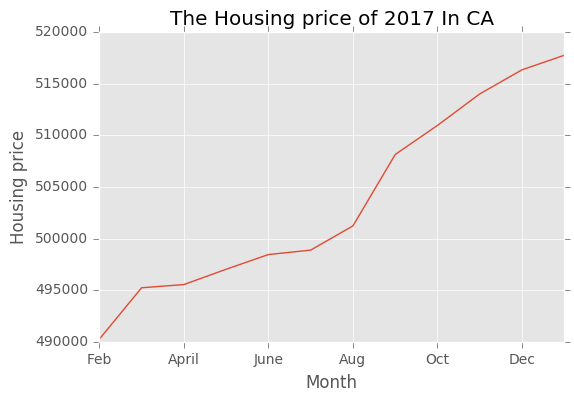

In [45]:
ca_dat.plot(x = "Mon",y = 0,kind = "line",legend = False)
plt.xlabel("Month")
plt.ylabel("Housing price")
plt.title("The Housing price of 2017 In CA")
plt.show()

In [4]:
Final_res_co = []
Final_model_ar = []
Final_model_ma = []
fordata = Forecast(find("00001","CO","A"))
Country = ["Los Angeles","San Diego","Orange","Riverside","Santa Clara","Sacramento","Fresno","San Francisco","Santa Barbara","Santa Cruz","Yolo","San Mateo","San Joaquin","Kern"]
resur_1 = []
for_dat = []
resur_1.extend(["00001","00004","00005","00010","00015","00022","00042","00060","00140","00221","00269","00073","00078","00056"])
for i in resur_1:
    ts = find(i,"CO","A")
    forc = Forecast(ts)
    fordata[i] = forc 
    Final_res_co.append(sum(TimeSeries(ts)[0])/12)
    Final_model_ar.append(TimeSeries(ts)[1])
    Final_model_ma.append(TimeSeries(ts)[2])
    print i
del fordata["res"]
fordata["San Mateo"] = fordata["San Mateo"]-20000

00001
00004
00005
00010
00015
00022
00042
00060
00140
00221
00269
00073
00078
00056


In [80]:
fordata

,Los Angeles,San Diego,Orange,Riverside,Santa Clara,Sacramento,Fresno,San Francisco,Santa Barbara,Santa Cruz,Yolo,San Mateo,San Joaquin,Kern
Jan,17.096892,-1305.291750,48.365794,2203.531350,-14208.092613,1630.387594,-1180.496342,-20324.575969,2869.624444,-13772.122238,6697.151497,-22300.070701,409.646733,-959.335595
Feb,-549.182569,569.440809,-444.579562,3406.736886,-7181.653837,1734.705069,-2771.125678,4692.345312,5897.270444,13699.108953,2971.683075,-10008.446926,-995.324574,-843.640035
March,-997.210101,-901.715221,4649.763376,261.356915,-29378.688088,1124.386979,-3844.706557,4671.576010,6511.955786,22754.348568,-3738.996939,-16745.843425,-12.726138,-309.160708
April,-676.964551,-475.440560,11337.052327,-1968.157228,-33489.024657,2949.207079,-6258.115707,14929.148557,5469.633472,-1280.153097,-3166.744527,-8764.111877,-1718.428446,-1161.924007
May,359.632324,-1755.473642,15339.478823,-474.551548,-32947.072784,3389.553109,-8760.766199,28578.119806,7147.977354,-4661.946414,3740.362867,-8459.322714,-2012.923170,-3224.552297
June,-611.660250,-1343.322122,7810.447379,-92.869620,-30834.903130,3650.591646,-9967.063564,40274.646306,3711.352939,-5048.407424,4928.233671,-1866.777889,-2064.832925,-3160.765106
July,2300.180279,-2758.877596,8385.960732,-2375.979876,-27185.641014,987.531198,-13901.775457,58119.983297,6762.925297,-7304.450393,-2078.028221,-16231.273333,-4948.494897,-3987.783731
Aug,5267.661741,-4141.533491,11156.926828,332.442291,-18202.181907,4154.750857,-14156.743773,67129.523446,14897.639562,-3577.169936,-4234.562597,9841.329627,-3274.236128,-3331.670920
Sep,7023.761583,-7562.582187,10527.722429,4120.745013,-28221.010240,386.975841,-13228.650504,73436.071679,22038.037864,-1831.980219,-7004.860586,5683.048045,-5616.879497,-2481.053118
Oct,6102.131090,-7087.462096,14558.063181,7135.878374,-30779.439815,-8769.146609,-14339.478680,62852.933342,26617.075285,-2367.470500,-2706.429645,-2177.001960,-3659.656248,-2764.033120


In [79]:
countries = ["jan","Feb","March","April","May","June","July","August","Sep","Oct","Nov","Dec"]
LA = list(fordata["Los Angeles"])
SD = list(fordata["San Diego"])
OR = list(fordata["Orange"])
RV = list(fordata["Riverside"])
SC = list(fordata["Santa Clara"])
SAC = list(fordata["Sacramento"])
Fres = list(fordata["Fresno"])
SF = list(fordata["San Francisco"])
SB = list(fordata["Santa Barbara"])
Santa_Cruz = list(fordata["Santa Cruz"])
Yolo = list(fordata["Yolo"])
San_Mateo = list(fordata["San Mateo"])
San_joaquin = list(fordata["San Joaquin"])
kern = list(fordata["Kern"])
trace1 = Scatter(
    x=countries, y=LA,
    line=Line(
        color='#FFD700',
        width=3
    ),
    name='LA'
)

trace2 = Scatter(
    x=countries, y = SD,
    line=Line(
        color='#C0C0C0',
        width=3
    ),
    name='SD'
)

trace3 = Scatter(
    x=countries, y=OR,
    line=Line(
        color='#BA8651',
        width=3
    ),
    name='OR'
)

trace4 = Scatter(
    x=countries, y=RV,
    line=Line(
        color='#000000',
        width=4
    ),
    name='Riverside'
)

trace5 = Scatter(
    x=countries, y=SAC,
    line=Line(
        color='#FFD700',
        width=3
    ),
    name='Sac'
)

trace6 = Scatter(
    x=countries, y = Fres,
    line=Line(
        color='#C0C0C0',
        width=3
    ),
    name='Fresno'
)

trace7 = Scatter(
    x=countries, y=SF,
    line=Line(
        color='#BA8651',
        width=3
    ),
    name='San Francisco'
)

trace8 = Scatter(
    x=countries, y=SB,
    line=Line(
        color='#000000',
        width=4
    ),
    name='Santa Barbara'
)
trace9 = Scatter(
    x=countries, y=Santa_Cruz,
    line=Line(
        color='#FFD700',
        width=3
    ),
    name='Santa Cruz'
)

trace10 = Scatter(
    x=countries, y = Yolo,
    line=Line(
        color='#C0C0C0',
        width=3
    ),
    name='Yolo'
)

trace11 = Scatter(
    x=countries, y=San_Mateo,
    line=Line(
        color='#BA8651',
        width=3
    ),
    name='San mateo'
)

trace12 = Scatter(
    x=countries, y = San_joaquin ,
    line=Line(
        color='#000000',
        width=4
    ),
    name='San joaquin '
)
trace13 = Scatter(
    x=countries, y= SC,
    line=Line(
        color='#BA8651',
        width=3
    ),
    name='Santa Clara'
)
trace14 = Scatter(
    x=countries, y= kern,
    line=Line(
        color='#BA8651',
        width=3
    ),
    name='Kern'
)
data = Data([trace1, trace2, trace3, trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12,trace13,trace14])
layout = Layout(
    title='The Residue of Housing Price in 2016',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True,False, False, False,False, False, False,False, False, False,False, False, False,False]],
                    label='LA',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False,True, False, False,False, False, False,False, False, False,False, False, False,False]],
                    label='SD',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False,False, True, False,False, False, False,False, False, False,False, False, False,False]],
                    label='Orange',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False,False, False, True,False, False, False,False, False, False,False, False, False,False]],
                    label='Riverside',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False,False, False, False,True, False, False,False, False, False,False, False, False,False]],
                    label='Sac',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False,False, False, False,False, True, False,False, False, False,False, False, False,False]],
                    label='Fresno',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False,False, False, False,False, False, True,False, False, False,False, False, False,False]],
                    label='SF',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False,False, False, False,False, False, False,True, False, False,False, False, False,False]],
                    label='Santa Barbara',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False,False, False, False,False, False, False,False, True, False,False, False, False,False]],
                    label='Santa Cruz',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False,False, False, False,False, False, False,False, False, True,False, False, False,False]],
                    label='Yolo',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False,False, False, False,False, False, False,False, False, False,True, False, False,False]],
                    label='San mateo',
                    method='restyle'
                ),
                    
                dict(
                    args=['visible', [False,False, False, False,False, False, False,False, False, False,False, True, False,False]],
                    label='San joaquin',
                    method='restyle'
                ),  
                    
                 dict(
                    args=['visible', [False,False, False, False,False, False, False,False, False, False,False, False, True,False]],
                    label='Santa Clara',
                    method='restyle'
                ) ,  
                dict(
                    args=['visible', [False,False, False, False,False, False, False,False, False, False,False, False, False,True]],
                    label='kern',
                    method='restyle'
                )    
                    ]),
        )
    ]),
)
fig = Figure(data=data, layout=layout)
py.iplot(fig)

In [20]:
model = pd.DataFrame([Final_model_ar,Final_model_ma])
model.columns = Country
model.index = ["AR","MA"]
model

,Los Angeles,San Diego,Orange,Riverside,Santa Clara,Sacramento,Fresno,San Francisco,Santa Barbara,Santa Cruz,Yolo,San Mateo,San Joaquin,Kern
AR,4,4,3,4,3,2,3,4,4,0,0,4,4,3
MA,4,4,3,2,1,1,0,4,4,2,2,0,3,2


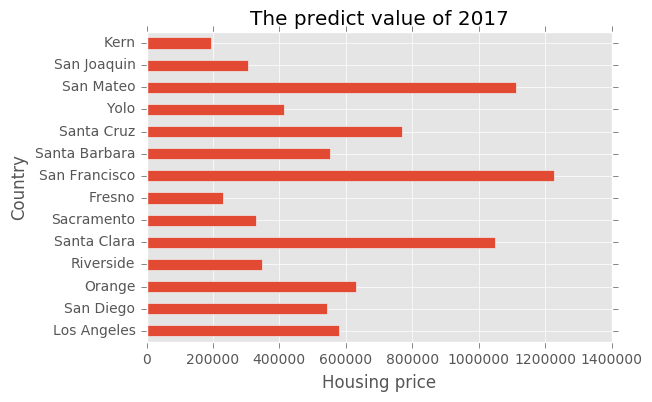

In [9]:
c = pd.DataFrame(Final_res_co,Country)
c["Country"] = Country
c.plot(y = 0,kind = "barh",legend = False)
plt.xlabel("Housing price")
plt.ylabel("Country")
plt.title("The predict value of the Median Housing price in 2017")
plt.show()